In [0]:
# WEB CRAWLING FOR NEWS ARTICLES AND PREDICTION OF VIRALITY FOR THOSE ARTICLES
# Pproject will go in three major steps:
# 1. Web crawling for collection of data
# 2. Data preprocessing
# 3. Training LDA Model
# 4. Get Topic Distribution per article(Feature vector will be probability distribution)
# 5. Machine Learning

In [0]:
#imporing all necessary dependencies/libraries

In [0]:
import json
import pandas as pd
import numpy as np
import nltk
import spacy
from datetime import datetime
import gensim
import gensim.corpora as corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile, datapath
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
import pprint
import requests 

In [0]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
secret = '******'  # API Key for extracting news data online

In [0]:
# Define the endpoint
url = 'https://newsapi.org/v2/everything?'

In [0]:
# Specify the query and number of returns
parameters = {
    'q': 'big data', # query phrase
    'pageSize': 20,  # maximum is 100
    'apiKey': secret # your own API key
}

In [0]:
# Now we can retrieve the news with the requests package.
# Make the request
response = requests.get(url, params=parameters)

# Convert the response to JSON format and pretty print it
response_json = response.json()
pprint.pprint(response_json)

{'articles': [{'author': 'Ingrid Lunden',
               'content': 'GDPR and other data protection and privacy '
                          'regulations — as well as a significant (and '
                          'growing) number of data breaches and exposées of '
                          'companies’ privacy policies — have put a spotlight '
                          'on not just on the vast troves of data that '
                          'businesses and other organiz… [+3286 chars]',
               'description': 'GDPR and other data protection and privacy '
                              'regulations — as well as a significant (and '
                              'growing) number of data breaches and exposées '
                              'of companies’ privacy policies — have put a '
                              'spotlight on not just on the vast troves of '
                              'data that businesses and other organiz…',
               'publishedAt': '2020-04-02T12:00:08

In [0]:
# Now we got the news in json format.The JSON file contains the following data points:

# url - The Url of the article
# etitile - Title of the article
# keywords - Keywords related to the article, includes keywords which are found in meta tags
# description - First 100-150 characters of content
# modified_date - Article published date
# body - Content of the article
# title - Title found in the header
# author - Author of the article
# source_id - source of Article

In [0]:
data=json.dumps(response_json)  # converting json data into string
data

'{"status": "ok", "totalResults": 28851, "articles": [{"source": {"id": "techcrunch", "name": "TechCrunch"}, "author": "Ingrid Lunden", "title": "Collibra nabs another $112.5M at a $2.3B valuation for its big data management platform", "description": "GDPR and other data protection and privacy regulations \\u2014 as well as a significant (and growing) number of data breaches and expos\\u00e9es of companies\\u2019 privacy policies \\u2014 have put a spotlight on not just on the vast troves of data that businesses and other organiz\\u2026", "url": "http://techcrunch.com/2020/04/02/collibra-nabs-another-112-5m-at-a-2-3b-valuation-for-its-big-data-management-platform/", "urlToImage": null, "publishedAt": "2020-04-02T12:00:08Z", "content": "GDPR and other data protection and privacy regulations \\u2014 as well as a significant (and growing) number of data breaches and expos\\u00e9es of companies\\u2019 privacy policies \\u2014 have put a spotlight on not just on the vast troves of data that

In [0]:
# lets make data into readable and processable format(dataframe format)

In [0]:
df=[{'author': 'Ingrid Lunden',
               'content': 'GDPR and other data protection and privacy '
                          'regulations — as well as a significant (and '
                          'growing) number of data breaches and exposées of '
                          'companies’ privacy policies — have put a spotlight '
                          'on not just on the vast troves of data that '
                          'businesses and other organiz… [+3286 chars]',
               'description': 'GDPR and other data protection and privacy '
                              'regulations — as well as a significant (and '
                              'growing) number of data breaches and exposées '
                              'of companies’ privacy policies — have put a '
                              'spotlight on not just on the vast troves of '
                              'data that businesses and other organiz…',
               'publishedAt': '2020-04-02T12:00:08Z',
               'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
               'title': 'Collibra nabs another $112.5M at a $2.3B valuation '
                        'for its big data management platform',
               'url': 'http://techcrunch.com/2020/04/02/collibra-nabs-another-112-5m-at-a-2-3b-valuation-for-its-big-data-management-platform/',
               'urlToImage': None},
              {'author': 'Beth Skwarecki on Vitals, shared by Beth Skwarecki '
                         'to Lifehacker',
               'content': 'If you cant look away from the climbing case '
                          'counts, look here. A visualization site called '
                          '91-DIVOC provides graphs of the epidemic curve, '
                          'comparing countries, and allowing you to see them '
                          'on either a linear or logarithmic scale. \r\n'
                          'When cases grow exponentia… [+1558 chars]',
               'description': 'If you can’t look away from the climbing case '
                              'counts, look here. A visualization site called '
                              '91-DIVOC provides graphs of the epidemic curve, '
                              'comparing countries, and allowing you to see '
                              'them on either a linear or logarithmic scale. '
                              'Read more...',
               'publishedAt': '2020-03-25T19:45:00Z',
               'source': {'id': None, 'name': 'Lifehacker.com'},
               'title': "Here's a New COVID-19 Data Site to Obsessively "
                        'Refresh',
               'url': 'https://vitals.lifehacker.com/heres-a-new-covid-19-data-site-to-obsessively-refresh-1842489889',
               'urlToImage': None},
              {'author': 'Devin Coldewey',
               'content': 'To someone with a hammer, every problem looks like '
                          'a nail and as expected, the tech sector is hard at '
                          'work hammering every nail it can find. But the '
                          'analytical prowess of the modern data ecosystem is '
                          'especially limited when attempting to tackle the '
                          'problem of… [+4581 chars]',
               'description': 'To someone with a hammer, every problem looks '
                              'like a nail — and as expected, the tech sector '
                              'is hard at work hammering every nail it can '
                              'find. But the analytical prowess of the modern '
                              'data ecosystem is especially limited when '
                              'attempting to tackle the problem …',
               'publishedAt': '2020-03-26T17:46:00Z',
               'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
               'title': 'AI and big data won’t work miracles in the fight '
                        'against coronavirus',
               'url': 'http://techcrunch.com/2020/03/26/ai-and-big-data-wont-work-miracles-in-the-fight-against-coronavirus/',
               'urlToImage': None},
              {'author': 'Natalie Wolchover',
               'content': 'Physicists have detected the strongest evidence yet '
                          'of a behavioral difference between elementary '
                          'particles called neutrinos and their mirror-image '
                          'twins, antineutrinos. The asymmetry could be the '
                          'key to why so much more matter than antimatter '
                          'arose during th… [+3511 chars]',
               'description': 'If matter and antimatter cancel each other out, '
                              'how can the universe exist? A discrepancy in '
                              'the behavior of neutrinos and antineutrinos '
                              'hints at an answer.',
               'publishedAt': '2020-04-19T12:00:00Z',
               'source': {'id': 'wired', 'name': 'Wired'},
               'title': 'An Imbalance Among Tiny Particles Offers a Big '
                        'Cosmology Clue',
               'url': 'https://www.wired.com/story/an-imbalance-among-tiny-particles-offers-a-big-cosmology-clue/',
               'urlToImage': None},
              {'author': 'Brendan Hesse and David Murphy',
               'content': 'There are over 500,000 stolen Zoom logins floating '
                          'around the dark web. Thats not good, especially '
                          'since theyre being sold for next to nothing, but '
                          'its a great reminder that you should not be using '
                          'the same credentials for different services. \r\n'
                          'You can undoan… [+2021 chars]',
               'description': 'There are over 500,000 stolen Zoom logins '
                              'floating around the dark web. That’s not good, '
                              'especially since they’re being sold for next to '
                              'nothing, but it’s a great reminder that you '
                              'should not be using the same credentials for '
                              'different services. Read more...',
               'publishedAt': '2020-04-14T18:15:00Z',
               'source': {'id': None, 'name': 'Lifehacker.com'},
               'title': 'How to Protect Your Zoom Account From Recent Data '
                        'Breaches',
               'url': 'https://lifehacker.com/how-to-protect-your-zoom-account-from-recent-data-breac-1842862007',
               'urlToImage': None},
              {'author': 'Rachel England',
               'content': 'Amazon’s cloud data centers have arrived in South '
                          'Africa, helping millions of people, businesses and '
                          'organizations to benefit from faster connectivity '
                          'and viable access to next-generation technology. '
                          'Amazon Web Services (AWS) is located in Cape Town '
                          'and has t… [+581 chars]',
               'description': 'Amazon’s cloud data centers have arrived in '
                              'South Africa, helping millions of people, '
                              'businesses and organizations to benefit from '
                              'faster connectivity and viable access to '
                              'next-generation technology. Amazon Web Services '
                              '(AWS) is located in Cape Town and has t…',
               'publishedAt': '2020-04-22T10:15:34Z',
               'source': {'id': 'engadget', 'name': 'Engadget'},
               'title': 'Amazon opens its first cloud data center in Africa',
               'url': 'https://www.engadget.com/amazon-opens-its-first-cloud-data-center-in-africa-101534093.html',
               'urlToImage': None},
              {'author': 'Sarah Scoles',
               'content': 'The model doesnt just help you get from the office '
                          'to Taco Bell: Ships and planescivilian and '
                          'militaryalso rely on it. One of NGAs biggest '
                          'customers is the military, says Paniccia. If youre '
                          'sailing across the ocean in an aircraft carrier, '
                          'its very important y… [+3538 chars]',
               'description': 'A new competition challenges scientists to '
                              "innovate on how we map Earth's constantly "
                              'shifting magnetic field—and make navigation '
                              'safer and more accurate.',
               'publishedAt': '2020-03-31T14:00:00Z',
               'source': {'id': 'wired', 'name': 'Wired'},
               'title': 'The Search for the Next Big Idea in Magnetic Field '
                        'Mapping',
               'url': 'https://www.wired.com/story/a-global-contest-seeks-the-next-big-idea-in-magnetic-mapping/',
               'urlToImage': None},
              {'author': 'David Murphy',
               'content': 'Dark Sky just announced it has been acquired by '
                          'Apple, and with the sale come a few big problems '
                          'for fans of the hyper-local weather app. First of '
                          'all, the Android app is going away altogetherfor '
                          'obvious reasons. You can continue to use it until '
                          'July 1, and s… [+4757 chars]',
               'description': 'Dark Sky just announced it has been acquired by '
                              'Apple, and with the sale come a few big '
                              'problems for fans of the hyper-local weather '
                              'app. First of all, the Android app is going '
                              'away altogether—for obvious reasons. You can '
                              'continue to use it until July 1, and …',
               'publishedAt': '2020-03-31T21:30:00Z',
               'source': {'id': None, 'name': 'Lifehacker.com'},
               'title': 'These Weather Apps Are Great Alternatives to the '
                        'Apple-Owned Dark Sky',
               'url': 'https://lifehacker.com/these-weather-apps-are-great-alternatives-to-the-apple-1842591377',
               'urlToImage': None},
              {'author': 'Taylor Hatmaker',
               'content': 'As the floor drops out from under many startups, '
                          'some tech companies are finding a path forward by '
                          'meeting new government needs.\r\n'
                          'Among them is Palantir, a secretive '
                          'government-friendly big data operation thats able '
                          'to ingest vast amounts of information to vi… [+3218 '
                          'chars]',
               'description': 'As the floor drops out from under many '
                              'startups, some tech companies are finding a '
                              'path forward by meeting new government needs. '
                              'Among them is Palantir, a secretive '
                              'government-friendly big data operation that’s '
                              'able to ingest vast amounts of information to '
                              'vi…',
               'publishedAt': '2020-04-01T17:53:24Z',
               'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
               'title': 'Palantir provides COVID-19 tracking software to CDC '
                        'and NHS, pitches European health agencies',
               'url': 'http://techcrunch.com/2020/04/01/palantir-coronavirus-cdc-nhs-gotham-foundry/',
               'urlToImage': None},
              {'author': 'Julie Shah, Neel Shah',
               'content': 'We need to direct computing power toward finding a '
                          'solution.\r\n'
                          '"&gt;\r\n'
                          'Executive Summary\r\n'
                          'Right now during the global pandemic, the awful '
                          'choice seems to be between saving lives or saving '
                          'livelihoods. The authors — one a roboticist and AI '
                          'researcher, one a publ… [+7550 chars]',
               'description': 'We need to direct computing power toward '
                              'finding a solution.',
               'publishedAt': '2020-04-06T15:00:00Z',
               'source': {'id': None, 'name': 'Hbr.org'},
               'title': 'Fighting Coronavirus with Big Data',
               'url': 'https://hbr.org/2020/04/fighting-coronavirus-with-big-data',
               'urlToImage': None},
              {'author': 'Brendan Hesse',
               'content': 'If you use the popular digital wallet app\xa0Key '
                          'Ring, a security update is an immediate must-do. '
                          'The app recently\xa0accidentally exposed the '
                          'personal information of over 44 million users due '
                          'to misconfigured Amazon Web Service (AWS) cloud '
                          'severs (via Threat Post)… [+2697 chars]',
               'description': 'If you use the popular digital wallet app\xa0'
                              'Key Ring, a security update is an immediate '
                              'must-do. The app recently\xa0accidentally '
                              'exposed the personal information of over 44 '
                              'million users due to misconfigured Amazon Web '
                              'Service (AWS) cloud severs (via Threat Post)…',
               'publishedAt': '2020-04-06T20:30:00Z',
               'source': {'id': None, 'name': 'Lifehacker.com'},
               'title': 'If You Use the Key Ring App, Update Your Account '
                        'Security Now',
               'url': 'https://lifehacker.com/if-you-use-the-key-ring-app-update-your-account-securi-1842710522',
               'urlToImage': None},
              {'author': 'Makena Kelly',
               'content': 'The calls follow a Wall Street Journal report\r\n'
                          'Illustration by Alex Castro / The Verge\r\n'
                          'Two US lawmakers spearheading an antitrust '
                          'investigation into Amazon are looking into whether '
                          'a top company official lied before Congress about '
                          'whether the e-commerce gian… [+3197 chars]',
               'description': 'Reps. Jerry Nadler and David Cicilline are '
                              'looking into whether a top Amazon official lied '
                              'before Congress about whether the e-commerce '
                              'giant uses independent seller data to create '
                              'its own products and unfairly compete on its '
                              'platform.',
               'publishedAt': '2020-04-24T16:02:43Z',
               'source': {'id': 'the-verge', 'name': 'The Verge'},
               'title': 'Democrats want to know if Amazon ‘lied’ about using '
                        'platform data to create products',
               'url': 'https://www.theverge.com/2020/4/24/21234522/democrats-david-cicilline-jerry-nadler-amazon-bezos',
               'urlToImage': None},
              {'author': 'Jacob Kastrenakes',
               'content': 'The US government is not willing to talk\r\n'
                          'Illustration by Alex Castro / The Verge\r\n'
                          'Huaweis revenue grew by 19.1 percent last year to '
                          'around $121 billion, but the company says those '
                          'numbers would be far higher if the United States '
                          'had not cracked down on its a… [+1437 chars]',
               'description': 'Huawei reported its 2019 earnings, saying '
                              'growth was hampered by the US trade ban. It was '
                              'unable to buy Intel processors and use Google '
                              'software, hurting server and phone sales.',
               'publishedAt': '2020-03-31T08:05:00Z',
               'source': {'id': 'the-verge', 'name': 'The Verge'},
               'title': 'Huawei says US trade ban is a ‘big difficulty’ to '
                        'selling phones',
               'url': 'https://www.theverge.com/2020/3/31/21200183/huawei-2019-earnings-financial-results-us-trade-ban',
               'urlToImage': None},
              {'author': 'Yessenia Funes on Earther, shared by Brian Kahn to '
                         'Gizmodo',
               'content': 'These maps show satellite data of nitrogen dioxide '
                          'over the Northeast in March, comparing the mean of '
                          'the period from 2015 through 2019 with the mean for '
                          '2020.\r\n'
                          'Gif: NASA\r\n'
                          'You can add the Northeast to the growing list of '
                          'regions seeing improved air quality am… [+2189 '
                          'chars]',
               'description': 'You can add the Northeast to the growing list '
                              'of regions seeing improved air quality amid the '
                              'ongoing pandemic. We’ve seen these big drops in '
                              'air pollution in China and Italy. And '
                              'preliminary data from other parts of the world '
                              'show similar trends, though it w…',
               'publishedAt': '2020-04-13T15:00:00Z',
               'source': {'id': None, 'name': 'Gizmodo.com'},
               'title': 'Coronavirus Lockdowns Have Reduced Air Pollution by '
                        '30 Percent in the Northeast',
               'url': 'https://earther.gizmodo.com/coronavirus-lockdowns-have-reduced-air-pollution-by-30-1842836450',
               'urlToImage': None},
              {'author': 'Ingrid Lunden',
               'content': 'One of the big challenges (among many) with the '
                          'coronavirus pandemic is that overwhelmed health '
                          'services do not always know how best to deploy the '
                          'limited resources that they have to meet the demand '
                          'of people falling ill with Covid-19. For example, '
                          'we know th… [+8505 chars]',
               'description': 'One of the big challenges (among many) with the '
                              'coronavirus pandemic is that overwhelmed health '
                              'services do not always know how best to deploy '
                              'the limited resources that they have to meet '
                              'the demand of people falling ill with Covid-19. '
                              'For example, we know th…',
               'publishedAt': '2020-03-25T16:12:59Z',
               'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
               'title': 'Self-reporting app for Covid-19 symptoms for UK '
                        'research sees 650k downloads in 24 hours',
               'url': 'http://techcrunch.com/2020/03/25/self-reporting-app-for-covid-19-symptoms-for-uk-research-sees-650k-downloads-in-24-hours/',
               'urlToImage': None},
              {'author': 'Mario Barra',
               'content': 'Big data analysis is the next innovative technique '
                          'that the telecommunications (telecom) sector is '
                          'deploying. Big data will tame the '
                          'telecommunications abundance of data, and enable '
                          'harvesting information gold from existing data '
                          'storage. We know that Big data… [+9757 chars]',
               'description': 'Big data analysis is the next innovative '
                              'technique that the telecommunications (telecom) '
                              'sector is deploying. Big data will tame the '
                              'telecommunications abundance of data, and '
                              'enable harvesting information “gold” from '
                              'existing data storage. We know that Big da…',
               'publishedAt': '2020-04-08T18:00:10Z',
               'source': {'id': None, 'name': 'Readwrite.com'},
               'title': 'Big Data in the Telecommunications Ecosystem',
               'url': 'https://readwrite.com/2020/04/08/big-data-in-the-telecommunications-ecosystem/',
               'urlToImage': None},
              {'author': 'Natasha Mascarenhas',
               'content': 'Brex wants to help startups get the money that '
                          'traditional big banks wont lend them, and it just '
                          'acquired three companies to help it do so: Neji, '
                          'Compose Labs and Landria. Per Brex, 12 new people '
                          'will be joining Brex in total from the three '
                          'companies.\xa0\r\n'
                          'While… [+2807 chars]',
               'description': 'Brex wants to help startups get the money that '
                              'traditional big banks won’t lend them, and it '
                              'just acquired three companies to help it do so: '
                              'Neji, Compose Labs and Landria. Per Brex, 12 '
                              'new people will be joining Brex in total from '
                              'the three companies. While …',
               'publishedAt': '2020-03-24T13:03:04Z',
               'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
               'title': 'Brex acquires three companies to build out its bank '
                        'alternative for startups',
               'url': 'http://techcrunch.com/2020/03/24/brex-acquires-three-companies-to-build-out-its-bank-alternative-for-startups/',
               'urlToImage': None},
              {'author': 'George Dvorsky on Earther, shared by Brian Kahn to '
                         'Gizmodo',
               'content': 'Scientists are attributing the 2018 Kilauea '
                          'eruption, which destroyed hundreds of homes on '
                          'Hawaiis Big Island, to a surprising source: intense '
                          'and sustained rainfall.\r\n'
                          'Excessive precipitation in the months leading up to '
                          'the eruption led to the collapse of roc… [+5411 '
                          'chars]',
               'description': 'Scientists are attributing the 2018 Kilauea '
                              'eruption, which destroyed hundreds of homes on '
                              'Hawaii’s Big Island, to a surprising source: '
                              'intense and sustained rainfall.Read more...',
               'publishedAt': '2020-04-22T15:00:00Z',
               'source': {'id': None, 'name': 'Gizmodo.com'},
               'title': "Heavy Rainfall May Have Sparked Kilauea's Explosive "
                        '2018 Eruption',
               'url': 'https://earther.gizmodo.com/heavy-rainfall-may-have-sparked-kilaueas-explosive-2018-1842999278',
               'urlToImage': None},
              {'author': 'Natasha Lomas',
               'content': 'The European Data Protection Board (EDPB) has '
                          'published guidance for the use of location data and '
                          'contacts tracing tools intended to mitigate the '
                          'impact of the COVID-19 pandemic.\r\n'
                          'Europe’s data protection framework wraps around all '
                          'such digital interventions,… [+10216 chars]',
               'description': 'The European Data Protection Board (EDPB) has '
                              'published guidance for the use of location data '
                              'and contacts tracing tools intended to mitigate '
                              'the impact of the COVID-19 pandemic. Europe’s '
                              'data protection framework wraps around all such '
                              'digital interventions, …',
               'publishedAt': '2020-04-22T13:03:21Z',
               'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
               'title': 'EU privacy body urges anonymization of location data '
                        'for COVID-19 tracking',
               'url': 'http://techcrunch.com/2020/04/22/eu-privacy-body-urges-anonymization-of-location-data-for-covid-19-tracking/',
               'urlToImage': None},
              {'author': 'PCMag',
               'content': "We're all leaning on our mobile data a little more "
                          'these days, which is why AT&amp;T is giving '
                          'mobility customers and small businesses a boost to '
                          'help them through the COVID-19 crisis.\r\n'
                          'From April 2 through May 13, the telecom will '
                          'automatically increase mobi… [+1789 chars]',
               'description': "We're all leaning on our mobile data a little "
                              'more these days, which is why AT&T is giving '
                              'mobility customers and small businesses a boost '
                              'to help them through the COVID-19 crisis. From '
                              'April 2 through May 13, the telecom will '
                              'automatically increase mobile ho…',
               'publishedAt': '2020-03-31T16:04:45Z',
               'source': {'id': 'mashable', 'name': 'Mashable'},
               'title': 'AT&T to increase mobile hotspot data by 15GB in April',
               'url': 'https://mashable.com/article/att-coronavirus-mobile-hotspot-data-increase/',
               'urlToImage': None}]

In [0]:
from pandas.io.json import json_normalize

In [0]:
reqd_data = pd.DataFrame.from_dict(json_normalize(df), orient='columns') # required converted data(json to csv format) for durther processing

In [0]:
reqd_data.head(2)  # showing first five records of data

,author,content,description,publishedAt,title,url,urlToImage,source.id,source.name
0,Ingrid Lunden,GDPR and other data protection and privacy reg...,GDPR and other data protection and privacy reg...,2020-04-02T12:00:08Z,Collibra nabs another $112.5M at a $2.3B valua...,http://techcrunch.com/2020/04/02/collibra-nabs...,None,techcrunch,TechCrunch
1,"Beth Skwarecki on Vitals, shared by Beth Skwar...",If you cant look away from the climbing case c...,If you can’t look away from the climbing case ...,2020-03-25T19:45:00Z,Here's a New COVID-19 Data Site to Obsessively...,https://vitals.lifehacker.com/heres-a-new-covi...,None,None,Lifehacker.com


In [0]:
print("The size of dataset of news articles is", reqd_data.shape)

The size of dataset of news articles is (20, 9)


In [0]:
reqd_data.columns   # checking all columns of data

Index(['author', 'content', 'description', 'publishedAt', 'title', 'url',
       'urlToImage', 'source.id', 'source.name'],
      dtype='object')

In [0]:
# Now we will remove columns from this which have no use for us for further processing

In [0]:
reqd_data=reqd_data.drop(['content','url','urlToImage', 'source.name', 'source.id'], axis=1) # removing unuseful columns

In [0]:
reqd_data.head() # after removal unuseful data

,author,description,publishedAt,title
0,Ingrid Lunden,GDPR and other data protection and privacy reg...,2020-04-02 12:00:08+00:00,Collibra nabs another $112.5M at a $2.3B valua...
1,"Beth Skwarecki on Vitals, shared by Beth Skwar...",If you can’t look away from the climbing case ...,2020-03-25 19:45:00+00:00,Here's a New COVID-19 Data Site to Obsessively...
2,Devin Coldewey,"To someone with a hammer, every problem looks ...",2020-03-26 17:46:00+00:00,AI and big data won’t work miracles in the fig...
3,Natalie Wolchover,If matter and antimatter cancel each other out...,2020-04-19 12:00:00+00:00,An Imbalance Among Tiny Particles Offers a Big...
4,Brendan Hesse and David Murphy,"There are over 500,000 stolen Zoom logins floa...",2020-04-14 18:15:00+00:00,How to Protect Your Zoom Account From Recent D...


In [0]:
# Lets convert column format into usable format

In [0]:
reqd_data['publishedAt']=pd.to_datetime(reqd_data['publishedAt'])

In [0]:
reqd_data.head()

,author,description,publishedAt,title
0,Ingrid Lunden,GDPR and other data protection and privacy reg...,2020-04-02 12:00:08+00:00,Collibra nabs another $112.5M at a $2.3B valua...
1,"Beth Skwarecki on Vitals, shared by Beth Skwar...",If you can’t look away from the climbing case ...,2020-03-25 19:45:00+00:00,Here's a New COVID-19 Data Site to Obsessively...
2,Devin Coldewey,"To someone with a hammer, every problem looks ...",2020-03-26 17:46:00+00:00,AI and big data won’t work miracles in the fig...
3,Natalie Wolchover,If matter and antimatter cancel each other out...,2020-04-19 12:00:00+00:00,An Imbalance Among Tiny Particles Offers a Big...
4,Brendan Hesse and David Murphy,"There are over 500,000 stolen Zoom logins floa...",2020-04-14 18:15:00+00:00,How to Protect Your Zoom Account From Recent D...


In [0]:
# Lets change the column names for more presentable data

In [0]:
final_data = reqd_data[['author', 'description', 'publishedAt', 'title']]                        # Extracting only useful columns into another df   
final_data.columns = ['author','body', 'publish_date', 'title']

In [0]:
final_data.head()  # final data with required and properly named columns

,author,body,publish_date,title
0,Ingrid Lunden,GDPR and other data protection and privacy reg...,2020-04-02 12:00:08+00:00,Collibra nabs another $112.5M at a $2.3B valua...
1,"Beth Skwarecki on Vitals, shared by Beth Skwar...",If you can’t look away from the climbing case ...,2020-03-25 19:45:00+00:00,Here's a New COVID-19 Data Site to Obsessively...
2,Devin Coldewey,"To someone with a hammer, every problem looks ...",2020-03-26 17:46:00+00:00,AI and big data won’t work miracles in the fig...
3,Natalie Wolchover,If matter and antimatter cancel each other out...,2020-04-19 12:00:00+00:00,An Imbalance Among Tiny Particles Offers a Big...
4,Brendan Hesse and David Murphy,"There are over 500,000 stolen Zoom logins floa...",2020-04-14 18:15:00+00:00,How to Protect Your Zoom Account From Recent D...


In [0]:
 print("before dropping duplicates", final_data.shape)
 final_data.drop_duplicates(subset=list(final_data.columns), keep='first', inplace=True)    # removing duplicates if present
 print("after dropping duplicates", final_data.shape)

before dropping duplicates (20, 4)
after dropping duplicates (20, 4)


In [0]:
# There is no change in size of dataset before and after removal of duplicates, Therefore there was no duplicate row in our datset

In [0]:
# lets check for any null values
final_data.isnull().sum()

author          0
body            0
publish_date    0
title           0
dtype: int64

In [0]:
# we have no null values in our dataset, which is good sign for processing of data

In [0]:
 final_data.sort_values(by='publish_date', axis=0, inplace=True) # Lets arrange the data by publish data by datyewise

In [0]:
final_data.head() # final cleaned and sorted data

,author,body,publish_date,title
16,Natasha Mascarenhas,Brex wants to help startups get the money that...,2020-03-24 13:03:04+00:00,Brex acquires three companies to build out its...
14,Ingrid Lunden,One of the big challenges (among many) with th...,2020-03-25 16:12:59+00:00,Self-reporting app for Covid-19 symptoms for U...
1,"Beth Skwarecki on Vitals, shared by Beth Skwar...",If you can’t look away from the climbing case ...,2020-03-25 19:45:00+00:00,Here's a New COVID-19 Data Site to Obsessively...
2,Devin Coldewey,"To someone with a hammer, every problem looks ...",2020-03-26 17:46:00+00:00,AI and big data won’t work miracles in the fig...
12,Jacob Kastrenakes,"Huawei reported its 2019 earnings, saying grow...",2020-03-31 08:05:00+00:00,Huawei says US trade ban is a ‘big difficulty’...


In [0]:
# Lets do text processing and topic Modeliing
# Topic Modeling in NLP seeks to find hidden semantic structure in documents.
# Latent Dirichlet Allocation (LDA) Topic modelling states that each document in a corpus is a combination of a fixed number of topics. A topic has a probability of generating various words, where the words are all the observed words in the corpus.

In [0]:
def article_to_words(articles):     # tokenizes articles & yeilds list of words for each article
    for article in articles:
        yield(gensim.utils.simple_preprocess(article, deacc=True))  # deacc=True removes punctuations

In [0]:
def remove_stopwords(texts):  # function will remove english stopwords
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'say', 'also', 'would', 'may'])
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [0]:
def make_bigrams(texts):
    '''Applies the bigram model(defined below) on each document'''
    return [bigram_mod[doc] for doc in texts]

In [0]:
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):  
# lemmatization does morphological analysis of the words & brings context to the words
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [0]:
# 
#def bigrams(words, bi_min=15, tri_min=10):
    #bigram = gensim.models.Phrases(words, min_count = bi_min)
    #bigram_mod = gensim.models.phrases.Phraser(bigram)
    #return bigram_mod

In [0]:
# LDA preprocessing:
# 1. list of all words present in articles
# 2.  Bigrams(When we are dealing with text classification, sometimes we need to do certain kind of natural language processing and hence sometimes require to form bigrams of words for processing.)
def preprocess(df):
    '''
    Input: clean dataframe
    Output: list of articles after preprocess, bigram model
    '''
    
    articles = list(df['body'])                                          # Corpus of content of all articles
    data_words = list(article_to_words(articles))                        # Each article is a list of all it's words after "simple_preprocess"
    
    common_terms = ["of", "with", "without", "and", "or", "the", "a"]
    bigram = gensim.models.Phrases(data_words, 
                                   min_count=4, 
                                   threshold=30, 
                                   common_terms=common_terms)            
    # Gensim’s Phrases class allows you to group related phrases into one token for LDA.
    bigram_mod = gensim.models.phrases.Phraser(bigram)                   
    
    return data_words, bigram_mod

In [0]:
data_words, bigram_mod = preprocess(final_data)

data_words_lemmatized = lemmatization(data_words)
data_words_nostops = remove_stopwords(data_words_lemmatized)
data_final = make_bigrams(data_words_nostops)

# Once you have that list of lists of unigrams and bigrams, you can pass it to gensim’s Dictionary class. This will output the word frequency count of each word for each article
word_dict = corpora.Dictionary(data_final)
# Bag of words (Document Term Frequency)
# list of tuples for each doc- (id,frequency) of word in that document
corpus = [word_dict.doc2bow(text) for text in data_final]  
# “The function doc2bow() simply counts the number of occurrences of each distinct word, converts the word to its integer word id and returns the result as a sparse vector

In [0]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(2, 1),
  (11, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1)],
 [(34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1)],
 [(27, 1),
  (48, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 2),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1)],
 [(72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1)],
 [(10, 1),
  (19, 1),
  (84, 1),
  (85

In [0]:
# LDA Modelling

In [0]:
import gensim
import logging # This allows for seeing if the model converges. A log file is created.
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    start=5; limit=30; step=5
    for num_topics in range(start, limit, step):
           
           lda_train = gensim.models.ldamulticore.LdaMulticore(
                           corpus=corpus,
                           num_topics=num_topics,
                           id2word=id2word,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)
    
    print(num_topics)
    
    lda_train.save('lda_train.model')


25


In [0]:
# Lets create coherence model too to find coherence score for articles

In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models`
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """

    import gensim
    import logging # This allows for seeing if the model converges. A log file is created.
    logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    with warnings.catch_warnings():
        warnings.simplefilter('ignore')


    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=word_dict,
                                           num_topics=num_topics,
                                           random_state=100,
                                           passes=20,
                                           per_word_topics=True,
                                           workers=25)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(num_topics)

    return model_list, coherence_values
    model.save('lda_train.model')

start=5; limit=30; step=5
model_list, coherence_values = compute_coherence_values(dictionary=word_dict, corpus=corpus, texts=data_final, start=start, limit=limit, step=step)


5
10
15
20
25


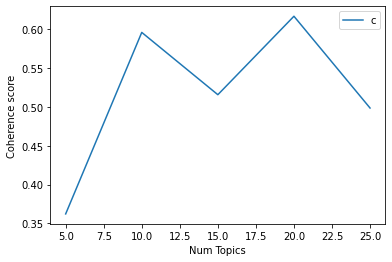

In [0]:
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
# This is good sign of having great cohenrence score (i.e. 0.65 for all 20 topics)
# Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.

In [0]:
# we can view the words making up each topic as below:
# we can see 10 of the 20 topics and the 15 top words for each.

In [0]:
lda_train.print_topics(19,num_words=15)[:10]

[(24,
  '0.090*"linear" + 0.060*"first" + 0.031*"reasons" + 0.031*"app" + 0.031*"apple" + 0.031*"come" + 0.031*"continue" + 0.031*"dark" + 0.031*"fans" + 0.031*"going" + 0.031*"hyper" + 0.031*"july" + 0.031*"local" + 0.031*"obvious" + 0.031*"problems"'),
 (15,
  '0.030*"harvesting" + 0.030*"lend" + 0.030*"amid" + 0.030*"air" + 0.030*"add" + 0.030*"technique" + 0.030*"tame" + 0.030*"ill" + 0.030*"storage" + 0.030*"next" + 0.030*"innovative" + 0.030*"china" + 0.030*"reported" + 0.030*"put" + 0.030*"gold"'),
 (20,
  '0.003*"innovative" + 0.003*"gold" + 0.003*"amid" + 0.003*"air" + 0.003*"add" + 0.003*"technique" + 0.003*"tame" + 0.003*"storage" + 0.003*"next" + 0.003*"improved" + 0.003*"harvesting" + 0.003*"analysis" + 0.003*"da" + 0.003*"web" + 0.003*"abundance"'),
 (8,
  '0.003*"innovative" + 0.003*"gold" + 0.003*"amid" + 0.003*"air" + 0.003*"add" + 0.003*"technique" + 0.003*"tame" + 0.003*"storage" + 0.003*"next" + 0.003*"improved" + 0.003*"harvesting" + 0.003*"analysis" + 0.003*"da" +

In [0]:
# Converting Topics to Feature Vectors

In [0]:
train_vecs = []
for i in range(len(final_data)-1):
    top_topics = lda_train.get_document_topics(corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(19)]
    topic_vec.extend([final_data.iloc[i].value_counts]) # counts of  for restaurant
    topic_vec.extend([len(final_data.iloc[i])]) # length review
    train_vecs.append(topic_vec)
print(train_vecs)
print(len(train_vecs))

[[0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.952, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, <bound method IndexOpsMixin.value_counts of author                                        Natasha Mascarenhas
body            Brex wants to help startups get the money that...
publish_date                            2020-03-24 13:03:04+00:00
title           Brex acquires three companies to build out its...
Name: 16, dtype: object>, 4], [0.001904762, 0.001904762, 0.95428574, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, <bound method IndexOpsMixin.value_counts of author                                              Ingrid Lunden
body            One of the big challenges (a

In [0]:
# This is showing distribution for the 20 found topics for 10 articles.

In [0]:
train_data = [x[:-2] for x in train_vecs]
print(train_data)
len(train_data) 

[[0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.952, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999, 0.0019999999], [0.001904762, 0.001904762, 0.95428574, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762, 0.001904762], [0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.9582609, 0.0017391306], [0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 0.0017391306, 

19

In [0]:
y =final_data.iloc[-1]
test_data=y.to_frame()
new_test=test_data.drop(['author','publish_date','title'], axis=0)
new_test

,11
body,Reps. Jerry Nadler and David Cicilline are loo...


In [0]:
train_vecs2 = []
for i in range(len(new_test)):
    top_topics = lda_train.get_document_topics(corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(19)]
    topic_vec.extend([new_test.iloc[i].value_counts]) # counts of  for restaurant
    topic_vec.extend([len(new_test.iloc[i])]) # length review
    train_vecs2.append(topic_vec)
train_vecs2

[[0.002,
  0.002,
  0.002,
  0.002,
  0.952,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  0.002,
  <bound method IndexOpsMixin.value_counts of 11    Reps. Jerry Nadler and David Cicilline are loo...
  Name: body, dtype: object>,
  1]]

In [0]:
for x in train_vecs2:
    test_data = x[:-2] 
print(test_data)
  # This is now we have target variable to test our model 

[0.002, 0.002, 0.002, 0.002, 0.952, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002]


In [0]:
# Training a model

In [0]:
X = np.array(train_data)
y = np.array(test_data)

In [0]:
print(X.shape)
print(y.shape)

(19, 19)
(19,)


In [0]:
from sklearn.model_selection import KFold

kf = KFold(2, shuffle=True, random_state=42)
model1_f1, model2_f1, model3_f1,  = [], [], []

for train_index, val_index in kf.split(X, y):
    # Assign CV IDX
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
    

In [0]:
# Scale Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_val_scale = scaler.transform(X_val)
print(X_train_scale.shape)
print(X_val_scale.shape)

(10, 19)
(9, 19)


In [0]:
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]


for item in classifiers:
    print("Machine learning model:",item)
    clf = item
    clf.fit(X_train_scale, y_train)
    print("Pedictins:",clf.predict(X_val_scale),'\n')
    print("Error in model:",mean_squared_error(y_val, clf.predict(X_val)))

Machine learning model: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Pedictins: [0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002] 

Error in model: 0.10027778238834198
Machine learning model: SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
Pedictins: [0.00802006 0.00056621 0.00048079 0.00796292 0.00048842 0.00078264
 0.00802006 0.00794746 0.00786184] 

Error in model: 0.10059506472221379
Machine learning model: BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=Tr

In [0]:
# According to multiple models, we can choose model with less errors adn best results.

In [0]:
# Other than this feature vectors for different words might tell us likelihiid of articles for its virality level.